In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
unemployment_df = pd.read_csv("data/unemployment_data.csv", skiprows=4)

In [4]:
unemployment_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806411,7.772705,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.416000,18.603000,17.584000,17.202000,17.953000,18.287000,17.363000,17.091000,17.086000,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.536000,27.035000,26.906000,28.468000,29.217000,34.007000,33.268000,32.098000,33.168000,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.239000,4.529000,5.033000,5.542000,6.033000,5.199000,5.995000,5.905000,5.961000,NaN


In [5]:
years_to_keep = [str(y) for y in range(1991, 2024)]
unemployment_df = unemployment_df[
    ["Country Name"] + years_to_keep
]

In [6]:
unemployment_df

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,8.179629,8.270724,8.266327,8.138291,7.908446,7.823908,7.783654,7.812734,7.849878,...,6.947011,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806411
2,Afghanistan,8.070000,8.011000,7.888000,7.822000,7.817000,7.867000,7.863000,7.890000,7.903000,...,7.915000,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000
3,Africa Western and Central,4.158680,4.251102,4.369805,4.393781,4.399749,4.340691,4.313735,4.324049,4.512158,...,3.881396,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245
4,Angola,16.855000,16.978000,17.399000,17.400000,16.987000,16.275000,16.172000,16.371000,16.593000,...,16.406000,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",8.409000,8.342000,8.344000,8.340000,8.988000,9.585000,10.223000,10.829000,11.460000,...,13.467000,17.900000,18.416000,18.603000,17.584000,17.202000,17.953000,18.287000,17.363000,17.091000
263,South Africa,23.002000,23.262000,23.179000,22.942000,22.647000,22.480000,22.518000,22.673000,22.791000,...,24.890000,25.149000,26.536000,27.035000,26.906000,28.468000,29.217000,34.007000,33.268000,32.098000
264,Zambia,18.900000,19.544000,19.700000,18.648000,16.828000,15.300000,13.305000,12.000000,12.495000,...,6.571000,5.942000,5.239000,4.529000,5.033000,5.542000,6.033000,5.199000,5.995000,5.905000


In [7]:
school_enrollment_teritory_df = pd.read_csv("data/school_enrollment_teritory_data.csv", skiprows=3)

In [8]:
school_enrollment_teritory_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,17.141621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.065542,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.573140,8.712690,8.750930,8.672730,8.711870,8.661860,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.995920,NaN,10.854360,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.269370,9.397760,9.588990,9.738760,9.935380,10.190260,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.782877,NaN,NaN,NaN,NaN,NaN,NaN,10.049358,9.954907,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,18.929298,21.090291,22.351543,22.244247,22.614874,22.343129,23.727104,23.493769,NaN,NaN
264,Zambia,ZMB,"School enrollment, tertiary (% gross)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
years_to_keep = [str(y) for y in range(1991, 2024)]
school_enrollment_teritory_df = school_enrollment_teritory_df[
    ["Country Name"] + years_to_keep
]

In [10]:
school_enrollment_teritory_df

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.751900,16.731239,17.141621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,3.32539,3.44453,3.58261,3.75828,3.77903,3.79064,3.81873,3.85900,3.82158,...,8.291040,8.434000,8.573140,8.712690,8.750930,8.672730,8.711870,8.661860,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.397640,NaN,NaN,NaN,9.995920,NaN,10.854360,NaN,NaN,NaN
3,Africa Western and Central,2.97763,3.11691,3.29300,3.45101,3.59402,3.78766,4.01411,4.16987,4.33807,...,9.392180,9.453030,9.269370,9.397760,9.588990,9.738760,9.935380,10.190260,NaN,NaN
4,Angola,0.60506,0.57333,NaN,NaN,NaN,NaN,NaN,0.61365,0.55463,...,NaN,8.783209,9.782877,NaN,NaN,NaN,NaN,NaN,NaN,10.049358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,3.99025,NaN,NaN,NaN,NaN,3.97207,NaN,9.01143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,11.84507,12.32732,13.62330,15.70450,NaN,NaN,NaN,NaN,NaN,...,18.481336,19.033295,18.929298,21.090291,22.351543,22.244247,22.614874,22.343129,23.727104,23.493769
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.39900,2.38266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1991          235 non-null    float64
 2   1992          235 non-null    float64
 3   1993          235 non-null    float64
 4   1994          235 non-null    float64
 5   1995          235 non-null    float64
 6   1996          235 non-null    float64
 7   1997          235 non-null    float64
 8   1998          235 non-null    float64
 9   1999          235 non-null    float64
 10  2000          235 non-null    float64
 11  2001          235 non-null    float64
 12  2002          235 non-null    float64
 13  2003          235 non-null    float64
 14  2004          235 non-null    float64
 15  2005          235 non-null    float64
 16  2006          235 non-null    float64
 17  2007          235 non-null    float64
 18  2008          235 non-null    

In [12]:
print(school_enrollment_teritory_df.isnull().sum())

Country Name      0
1991            172
1992            172
1993            180
1994            186
1995            181
1996            186
1997            201
1998            198
1999            144
2000            112
2001            106
2002             94
2003             94
2004             95
2005             98
2006             98
2007            101
2008             94
2009             90
2010             85
2011             82
2012             78
2013             89
2014             83
2015             73
2016             85
2017             85
2018             88
2019             90
2020             90
2021             98
2022            105
2023            105
dtype: int64


In [13]:
unemp_long_df = unemployment_df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Unemployment_rate"
)

In [14]:
unemp_long_df

,Country Name,Year,Unemployment_rate
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,8.179629
2,Afghanistan,1991,8.070000
3,Africa Western and Central,1991,4.158680
4,Angola,1991,16.855000
...,...,...,...
8773,Kosovo,2023,NaN
8774,"Yemen, Rep.",2023,17.091000
8775,South Africa,2023,32.098000
8776,Zambia,2023,5.905000


In [15]:
edu_long_df = school_enrollment_teritory_df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="Education_level"
)

In [16]:
edu_long_df

,Country Name,Year,Education_level
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,3.325390
2,Afghanistan,1991,NaN
3,Africa Western and Central,1991,2.977630
4,Angola,1991,0.605060
...,...,...,...
8773,Kosovo,2023,NaN
8774,"Yemen, Rep.",2023,NaN
8775,South Africa,2023,23.493769
8776,Zambia,2023,NaN


In [17]:
unemp_long_df["Year"] = unemp_long_df["Year"].astype(str)
edu_long_df["Year"] = edu_long_df["Year"].astype(str)

In [18]:
merged_df = unemp_long_df.merge(
    edu_long_df,
    on=["Country Name", "Year"],
    how="inner"
)

In [19]:
merged_df

,Country Name,Year,Unemployment_rate,Education_level
0,Aruba,1991,NaN,NaN
1,Africa Eastern and Southern,1991,8.179629,3.325390
2,Afghanistan,1991,8.070000,NaN
3,Africa Western and Central,1991,4.158680,2.977630
4,Angola,1991,16.855000,0.605060
...,...,...,...,...
8773,Kosovo,2023,NaN,NaN
8774,"Yemen, Rep.",2023,17.091000,NaN
8775,South Africa,2023,32.098000,23.493769
8776,Zambia,2023,5.905000,NaN


In [20]:
merged_df.duplicated(subset=["Country Name", "Year"]).sum()

np.int64(0)

In [21]:
merged_df = merged_df[~merged_df["Country Name"].str.contains(
    "World|income|Asia|Africa|Europe|OECD|Arab",
    case=False,
    na=False
)]

In [22]:
merged_df

,Country Name,Year,Unemployment_rate,Education_level
0,Aruba,1991,NaN,NaN
2,Afghanistan,1991,8.070,NaN
4,Angola,1991,16.855,0.605060
5,Albania,1991,10.304,NaN
6,Andorra,1991,NaN,NaN
...,...,...,...,...
8772,Samoa,2023,4.977,14.610664
8773,Kosovo,2023,NaN,NaN
8774,"Yemen, Rep.",2023,17.091,NaN
8776,Zambia,2023,5.905,NaN


In [23]:
merged_df = merged_df[merged_df["Year"].astype(int) >= 2000]
analysis_df = merged_df[
    ["Country Name", "Year", "Unemployment_rate", "Education_level"]
].dropna()

In [24]:
analysis_df

,Country Name,Year,Unemployment_rate,Education_level
2403,Argentina,2000,15.000,54.084351
2404,Armenia,2000,11.095,32.530521
2410,Burundi,2000,3.129,1.054750
2411,Belgium,2000,6.586,56.201832
2412,Benin,2000,0.864,3.496050
...,...,...,...,...
8758,Tanzania,2023,2.582,5.168878
8762,Uruguay,2023,8.355,79.953690
8764,Uzbekistan,2023,4.460,45.759177
8769,Viet Nam,2023,1.645,32.841513


In [25]:
analysis_df.isnull().sum()

Country Name         0
Year                 0
Unemployment_rate    0
Education_level      0
dtype: int64

In [26]:
corr_pearson = analysis_df["Unemployment_rate"].corr(
    analysis_df["Education_level"],
    method="pearson"
)

corr_pearson

np.float64(0.05852424596577725)

In [27]:
print(corr_pearson)

0.05852424596577725


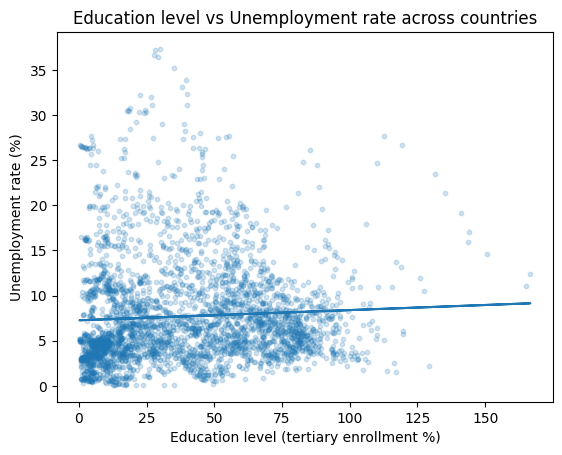

In [29]:
x = analysis_df["Education_level"]
y = analysis_df["Unemployment_rate"]

coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

plt.scatter(x, y, alpha=0.2, s=10)
plt.plot(x, trend(x))
plt.xlabel("Education level (tertiary enrollment %)")
plt.ylabel("Unemployment rate (%)")
plt.title("Education level vs Unemployment rate across countries")
plt.show()

Add trend analysis over time

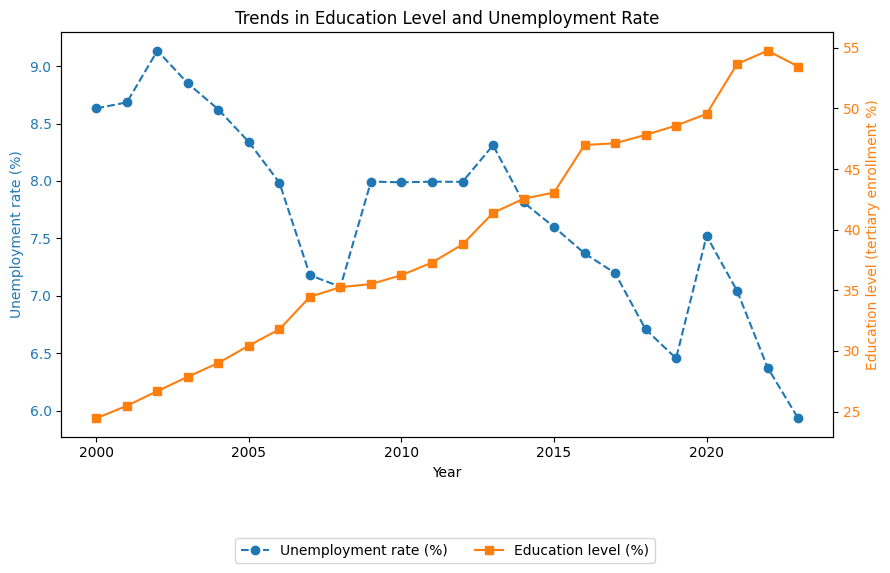

In [37]:
# make sure Year is numeric and sorted
yearly_avg = yearly_avg.copy()
yearly_avg.index = yearly_avg.index.astype(int)
yearly_avg = yearly_avg.sort_index()

fig, ax1 = plt.subplots(figsize=(9, 5))

# Unemployment line (blue)
line1, = ax1.plot(
    yearly_avg.index,
    yearly_avg["Unemployment_rate"],
    color="tab:blue",
    linestyle="--",
    marker="o",
    label="Unemployment rate (%)"
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Unemployment rate (%)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Education line (orange)
ax2 = ax1.twinx()
line2, = ax2.plot(
    yearly_avg.index,
    yearly_avg["Education_level"],
    color="tab:orange",
    linestyle="-",
    marker="s",
    label="Education level (%)"
)
ax2.set_ylabel("Education level (tertiary enrollment %)", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Legend under the plot
fig.legend(
    [line1, line2],
    ["Unemployment rate (%)", "Education level (%)"],
    loc="lower center",
    ncol=2,
    bbox_to_anchor=(0.5, -0.15)
)

plt.title("Trends in Education Level and Unemployment Rate")
plt.tight_layout()
plt.show()

How much does unemployment change when education increases?

In [40]:

X = analysis_df["Education_level"]
y = analysis_df["Unemployment_rate"]

X = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.38
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           0.000750
Time:                        16:38:13   Log-Likelihood:                -10381.
No. Observations:                3314   AIC:                         2.077e+04
Df Residuals:                    3312   BIC:                         2.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.2582      0.163     

The regression analysis shows a statistically significant but very small positive association between tertiary education enrollment and unemployment. However, the explanatory power of the model is extremely low, indicating that education alone does not explain cross-country differences in unemployment. This suggests that unemployment is shaped by multiple economic and institutional factors beyond education.

In [42]:
country_avg = analysis_df.groupby("Country Name")[
    ["Education_level", "Unemployment_rate"]
].mean()

X = sm.add_constant(country_avg["Education_level"])
y = country_avg["Unemployment_rate"]

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Unemployment_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4300
Date:                Sun, 04 Jan 2026   Prob (F-statistic):              0.513
Time:                        16:48:26   Log-Likelihood:                -582.68
No. Observations:                 189   AIC:                             1169.
Df Residuals:                     187   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.3515      0.630     11.668      0.000       6.109       8.595
Education_level     0.0093      0.014      0.656      0.513      -0.019       0.037
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.466
Skew:                           1.488   Prob(JB):                     1.03e-24
Kurtosis:                       5.275   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While a simple pooled regression suggests a statistically significant but very small association, the country-level average regression shows no significant relationship between education and unemployment. This indicates that education alone does not explain cross-country differences in unemployment and that broader economic and institutional factors likely play a dominant role.

Do countries with higher average education have lower average unemployment?

In [44]:
country_avg = analysis_df.groupby("Country Name")[
    ["Education_level", "Unemployment_rate"]
].mean().reset_index()

print(country_avg["Education_level"].corr(country_avg["Unemployment_rate"]))



0.04789550655415325


In [49]:
gdp_df = pd.read_csv("data/gdp_per_capita.csv", skiprows=4)

In [50]:
gdp_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.550214,28440.041688,30082.158423,30645.890602,22759.807175,26749.329609,30975.998912,35718.753119,39498.594129,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448,NaN


In [51]:
years = [str(y) for y in range(1991, 2024)]

gdp_df = gdp_df[["Country Name"] + years]

In [52]:
gdp_long = gdp_df.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="GDP_per_capita"
)

gdp_long["Year"] = gdp_long["Year"].astype(str)

In [53]:
analysis_with_gdp = analysis_df.merge(
    gdp_long,
    on=["Country Name", "Year"],
    how="left"
)

In [54]:
analysis_with_gdp = analysis_with_gdp.dropna(
    subset=["Education_level", "Unemployment_rate", "GDP_per_capita"]
)

In [55]:
analysis_with_gdp

,Country Name,Year,Unemployment_rate,Education_level,GDP_per_capita
0,Argentina,2000,15.000,54.084351,7637.014892
1,Armenia,2000,11.095,32.530521,593.450582
2,Burundi,2000,3.129,1.054750,134.537862
3,Belgium,2000,6.586,56.201832,23098.886508
4,Benin,2000,0.864,3.496050,487.424141
...,...,...,...,...,...
3309,Tanzania,2023,2.582,5.168878,1224.002197
3310,Uruguay,2023,8.355,79.953690,23019.422156
3311,Uzbekistan,2023,4.460,45.759177,2878.968793
3312,Viet Nam,2023,1.645,32.841513,4323.350320


In [56]:
analysis_with_gdp["log_GDP_pc"] = np.log(analysis_with_gdp["GDP_per_capita"])

In [57]:
X = analysis_with_gdp[["Education_level", "log_GDP_pc"]]
X = sm.add_constant(X)

y = analysis_with_gdp["Unemployment_rate"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment_rate   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.843
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           5.47e-05
Time:                        17:04:42   Log-Likelihood:                -10350.
No. Observations:                3305   AIC:                         2.071e+04
Df Residuals:                    3302   BIC:                         2.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.2407      0.694     

After controlling for GDP per capita, education level shows a small but statistically significant positive association with unemployment, while GDP per capita is negatively associated with unemployment. The overall explanatory power of the model remains low, indicating that unemployment is shaped by multiple economic and institutional factors beyond education alone.